# The Geography of Happiness
A data-driven exploration of global happiness rankings and patterns.


In [1]:
# Imports
import pandas as pd
import matplotlib as plt

In [2]:
# Read file
df = pd.read_excel('/content/world_happiness.xlsx')
print(df.head())

   Year  Rank Country name  Life evaluation (3-year average)  Lower whisker  \
0  2024   147  Afghanistan                             1.364          1.301   
1  2023   143  Afghanistan                             1.721          1.667   
2  2022   137  Afghanistan                             1.859          1.795   
3  2021   146  Afghanistan                             2.404          2.339   
4  2020   150  Afghanistan                             2.523          2.449   

   Upper whisker  Explained by: Log GDP per capita  \
0          1.427                             0.649   
1          1.775                             0.628   
2          1.923                             0.645   
3          2.469                             0.758   
4          2.596                             0.370   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                           0.0                                  0.155   
1                           0.0                     

In [3]:
# Select columns
df = df[['Year', 'Rank', 'Country name', 'Life evaluation (3-year average)']]
print(df.head())

   Year  Rank Country name  Life evaluation (3-year average)
0  2024   147  Afghanistan                             1.364
1  2023   143  Afghanistan                             1.721
2  2022   137  Afghanistan                             1.859
3  2021   146  Afghanistan                             2.404
4  2020   150  Afghanistan                             2.523


In [4]:
# Take average for years 2011 to 2024
df_avg = df.groupby('Country name').mean()
print(df_avg.head())

                     Year        Rank  Life evaluation (3-year average)
Country name                                                           
Afghanistan   2017.846154  145.923077                          2.946146
Albania       2017.846154   94.615385                          5.033669
Algeria       2017.846154   79.307692                          5.415854
Angola        2014.166667  126.000000                          4.209333
Argentina     2017.846154   41.230769                          6.275438


In [5]:
# Rename Happiness
df_avg = df_avg.drop(columns=['Year'])
df_avg = df_avg.rename(columns={'Life evaluation (3-year average)': 'Happiness'})
print(df_avg.head())

                    Rank  Happiness
Country name                       
Afghanistan   145.923077   2.946146
Albania        94.615385   5.033669
Algeria        79.307692   5.415854
Angola        126.000000   4.209333
Argentina      41.230769   6.275438


# Country Ranking

In [6]:
# Rank based on average rank
df_ranked = df_avg.sort_values(by='Rank', ascending=True)

# Print top 10
df_ranked.head(10)

,Rank,Happiness
Country name,,
Denmark,2.000000,7.605431
Finland,2.615385,7.646900
Norway,4.615385,7.462154
Iceland,5.076923,7.460269
Switzerland,5.230769,7.429531
Netherlands,5.538462,7.415608
Sweden,7.076923,7.356885
New Zealand,9.461538,7.233738
Canada,10.153846,7.211777


In [7]:
# Print bottom 10
df_ranked.tail(10)

,Rank,Happiness
Country name,,
Haiti,139.666667,3.865978
Yemen,140.833333,3.761783
Togo,141.000000,3.748938
Tanzania,144.615385,3.613554
Syria,145.428571,3.584000
Afghanistan,145.923077,2.946146
Rwanda,148.500000,3.510730
South Sudan,150.400000,3.269320
Burundi,150.555556,3.370033


In [8]:
# Print full list
print(df_ranked.to_string())

                                Rank  Happiness
Country name                                   
Denmark                     2.000000   7.605431
Finland                     2.615385   7.646900
Norway                      4.615385   7.462154
Iceland                     5.076923   7.460269
Switzerland                 5.230769   7.429531
Netherlands                 5.538462   7.415608
Sweden                      7.076923   7.356885
New Zealand                 9.461538   7.233738
Canada                     10.153846   7.211777
Israel                     10.384615   7.252662
Australia                  10.538462   7.213062
Austria                    11.846154   7.141785
Luxembourg                 13.230769   7.094038
Costa Rica                 14.076923   7.057646
Ireland                    15.461538   7.003054
United States              17.153846   6.965892
Belgium                    17.769231   6.911731
United Kingdom             19.000000   6.879808
Germany                    19.461538   6

# Average Happiness Score by Country - Map

In [9]:
import plotly.express as px

fig = px.choropleth(
    df_ranked.reset_index(), # Reset index to make 'Country name' a column
    locations="Country name",
    locationmode="country names",
    color="Happiness",
    color_continuous_scale="RdYlGn",
    title="Average Happiness Score by Country (2011–2024)"
)

fig.update_layout(
    coloraxis_colorbar=dict(title="Happiness Score"),
    title_x=0.45
)

fig.show()

# Continent Ranking

In [10]:
!pip install pycountry-convert
import pycountry_convert as pc
import geopandas as gpd
import matplotlib.pyplot as plt


In [11]:
# Get continent information
def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_dict = {
            "AF": "Africa",
            "AS": "Asia",
            "EU": "Europe",
            "NA": "North America",
            "SA": "South America",
            "OC": "Oceania"
        }
        return continent_dict[continent_code]
    except:
        return None

df_ranked = df_ranked.reset_index()  # Reset index to make 'Country name' a column
df_ranked["Continent"] = df_ranked["Country name"].apply(country_to_continent)

In [12]:
# Print top 10 with continent info
df_ranked.head()

,Country name,Rank,Happiness,Continent
0,Denmark,2.000000,7.605431,Europe
1,Finland,2.615385,7.646900,Europe
2,Norway,4.615385,7.462154,Europe
3,Iceland,5.076923,7.460269,Europe
4,Switzerland,5.230769,7.429531,Europe


In [13]:
# Rank by continent with average happiness
continent_ranking = df_ranked.groupby('Continent')['Happiness'].mean().sort_values(ascending=False).reset_index()
print('Continent Ranking by Average Happiness:')
print(continent_ranking.to_string())

Continent Ranking by Average Happiness:
       Continent  Happiness
0        Oceania   7.223400
1         Europe   6.270490
2  North America   6.132405
3  South America   6.053180
4           Asia   5.296330
5         Africa   4.346544


# Average Happiness Score by Continent - Map

--2026-02-28 20:01:55--  https://raw.githubusercontent.com/datasets/geo-countries/main/data/countries.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14643643 (14M) [text/plain]
Saving to: ‘world_countries.geojson’

world_countries.geo 100%[===================>]  13.96M  --.-KB/s    in 0.1s    

2026-02-28 20:01:55 (105 MB/s) - ‘world_countries.geojson’ saved [14643643/14643643]

-rw-r--r-- 1 root root 14M Feb 28 20:01 world_countries.geojson
{
"type": "FeatureCollection",
"name": "ne_10m_admin_0_countries",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
"features": [


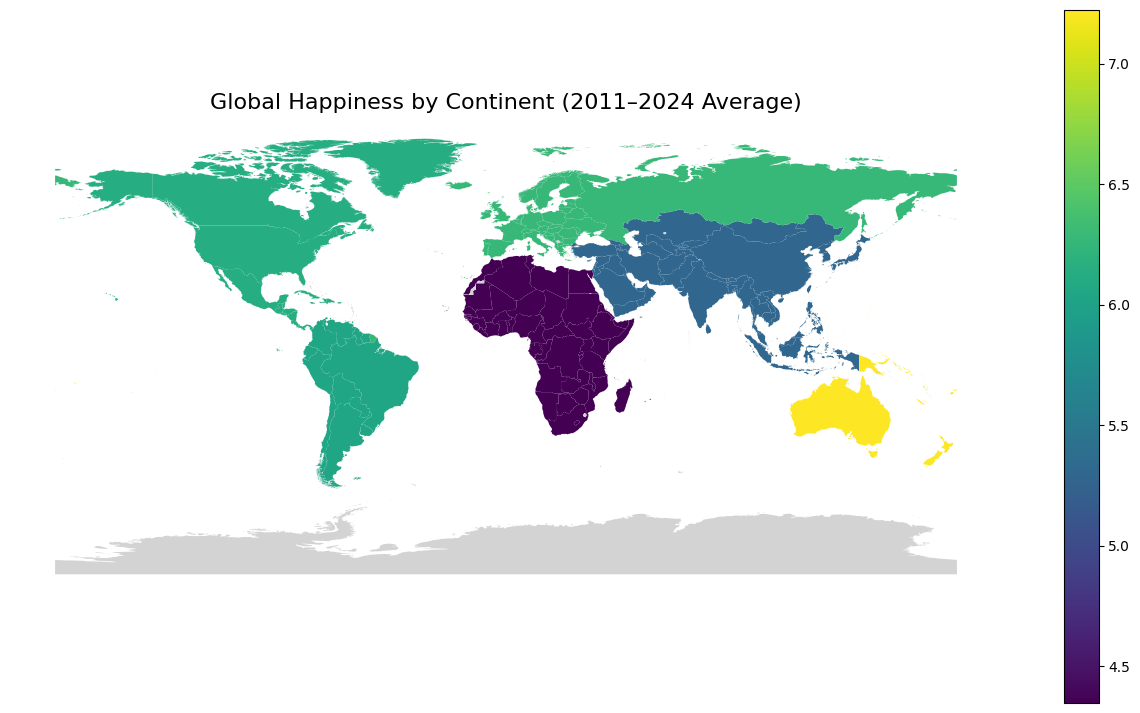

In [14]:
# Continent Happiness Map

# 1) Continent results
continent_avg = pd.DataFrame({
    "Continent": ["Oceania", "Europe", "North America", "South America", "Asia", "Africa"],
    "Happiness": [7.223400, 6.270490, 6.132405, 6.053180, 5.296330, 4.346544]
})

# 2) Load world map (Natural Earth countries) by downloading a GeoJSON directly
!wget -O world_countries.geojson https://raw.githubusercontent.com/datasets/geo-countries/main/data/countries.geojson

# Verify file content
!ls -lh world_countries.geojson
!head -n 5 world_countries.geojson

world = gpd.read_file('world_countries.geojson', driver='GeoJSON', engine='fiona')

# Create 'Continent' column in world GeoDataFrame using the 'name' column
world['Continent'] = world['name'].apply(country_to_continent)

# 3) Drop Antarctica
world = world[world["Continent"] != "Antarctica"].copy()

# 4) Merge continent happiness onto each country
merged = world.merge(
    continent_avg,
    how="left",
    left_on="Continent",
    right_on="Continent"
)

# 5) Plot
fig, ax = plt.subplots(1, 1, figsize=(16, 9))

merged.plot(
    column="Happiness",
    ax=ax,
    legend=True,
    missing_kwds={"color": "lightgrey", "label": "Missing"},
)

ax.set_title("Global Happiness by Continent (2011–2024 Average)", fontsize=16)
ax.set_axis_off()

plt.show()

# Average Happiness Score by Continent - Bar Chart

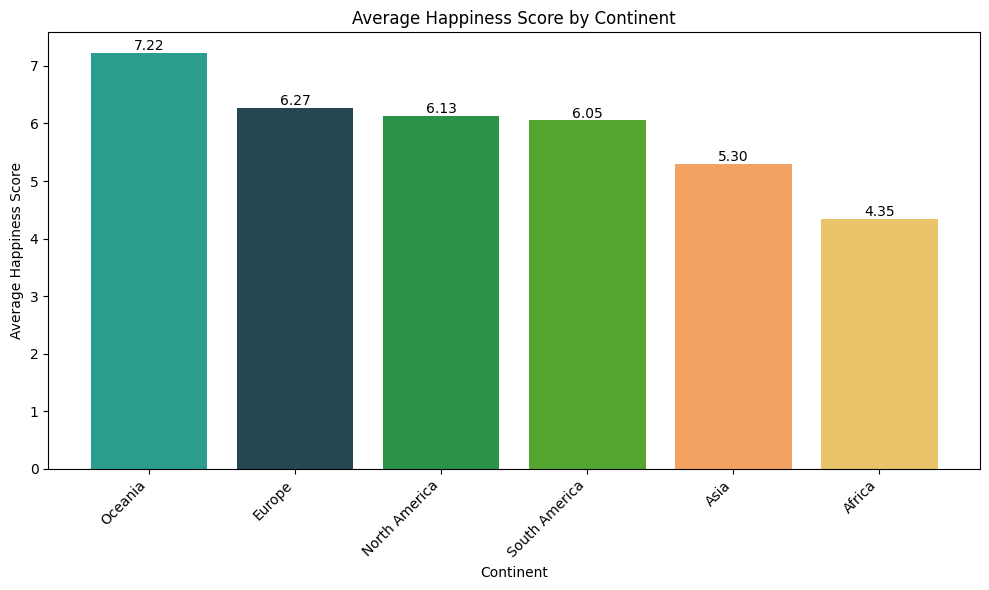

In [15]:
# Bar chart

continent_colors = {
    "Oceania": "#2a9d8f",       # teal
    "Europe": "#264653",        # deep blue
    "North America": "#2b9348", # dark green
    "South America": "#55a630", # lighter green
    "Asia": "#f4a261",          # soft orange
    "Africa": "#e9c46a"         # warm yellow
}

# Map colors to continents based on the order in continent_ranking
colors = [continent_colors[continent] for continent in continent_ranking['Continent']]

plt.figure(figsize=(10, 6))
plt.bar(continent_ranking['Continent'], continent_ranking['Happiness'], color=colors)
plt.xlabel('Continent')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score by Continent')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(continent_avg["Happiness"]):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()

# Standard Devaiation

In [16]:
country_happiness_std = df.groupby('Country name')['Life evaluation (3-year average)'].std().reset_index()
country_happiness_std = country_happiness_std.rename(columns={'Life evaluation (3-year average)': 'Happiness Std Dev'})

country_counts = df.groupby("Country name")["Year"].count().reset_index()
country_counts = country_counts.rename(columns={"Year": "NumYears"})

country_stability = country_happiness_std.merge(country_counts, on="Country name")

# Keep countries with at least 10 years
country_stability_filtered = country_stability[country_stability["NumYears"] >= 10]

# Rank by standard deviation
country_stability_ranked = country_stability_filtered.sort_values(by='Happiness Std Dev', ascending=True)

# Merge with df_avg to get the Happiness score
country_stability_ranked = country_stability_ranked.merge(df_avg.reset_index()[['Country name', 'Happiness']], on='Country name', how='left')

print('Countries with at least 10 years of data, ranked by Happiness Standard Deviation (Lowest to Highest):')
print(country_stability_ranked[['Country name', 'Happiness', 'Happiness Std Dev', 'NumYears']].head(10))

Countries with at least 10 years of data, ranked by Happiness Standard Deviation (Lowest to Highest):
             Country name  Happiness  Happiness Std Dev  NumYears
0                  Sweden   7.356885           0.049938        13
1  Hong Kong SAR of China   5.441415           0.065685        13
2             Netherlands   7.415608           0.069641        13
3                 Belgium   6.911731           0.075359        13
4                 Bolivia   5.765808           0.089417        13
5            Saudi Arabia   6.464423           0.092209        13
6                 Denmark   7.605431           0.092744        13
7                   Japan   5.995215           0.093083        13
8                  Israel   7.252662           0.099214        13
9                  France   6.614600           0.100784        13


# Average Happiness Score vs Standard Devation Scatter Plot

In [17]:
import plotly.express as px

fig = px.scatter(
    country_stability_ranked,
    x="Happiness",
    y="Happiness Std Dev",
    hover_name="Country name",
    title="Country Happiness: Average vs. Standard Deviation (2011-2024)",
    labels={
        "Happiness": "Average Happiness Score",
        "Happiness Std Dev": "Happiness Standard Deviation"
    },
    trendline="ols", # Add Ordinary Least Squares regression line
    trendline_color_override='red',
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(xaxis_title="Average Happiness Score", yaxis_title="Happiness Standard Deviation")
fig.show()

correlation = country_stability_ranked['Happiness'].corr(country_stability_ranked['Happiness Std Dev'])
print(f"Correlation Coefficient between Average Happiness and Happiness Standard Deviation: {correlation:.2f}")

Correlation Coefficient between Average Happiness and Happiness Standard Deviation: -0.52


# 👤 Author

Basak Kaya

MEng Student, Mechanical & Industrial Engineering

University of Toronto